In [1]:
import pandas as pd 

### Loading the data

In [2]:
csv_path = '../../datasets/housing.csv'
housing  = pd.read_csv(csv_path)
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


### Inspecting the data

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

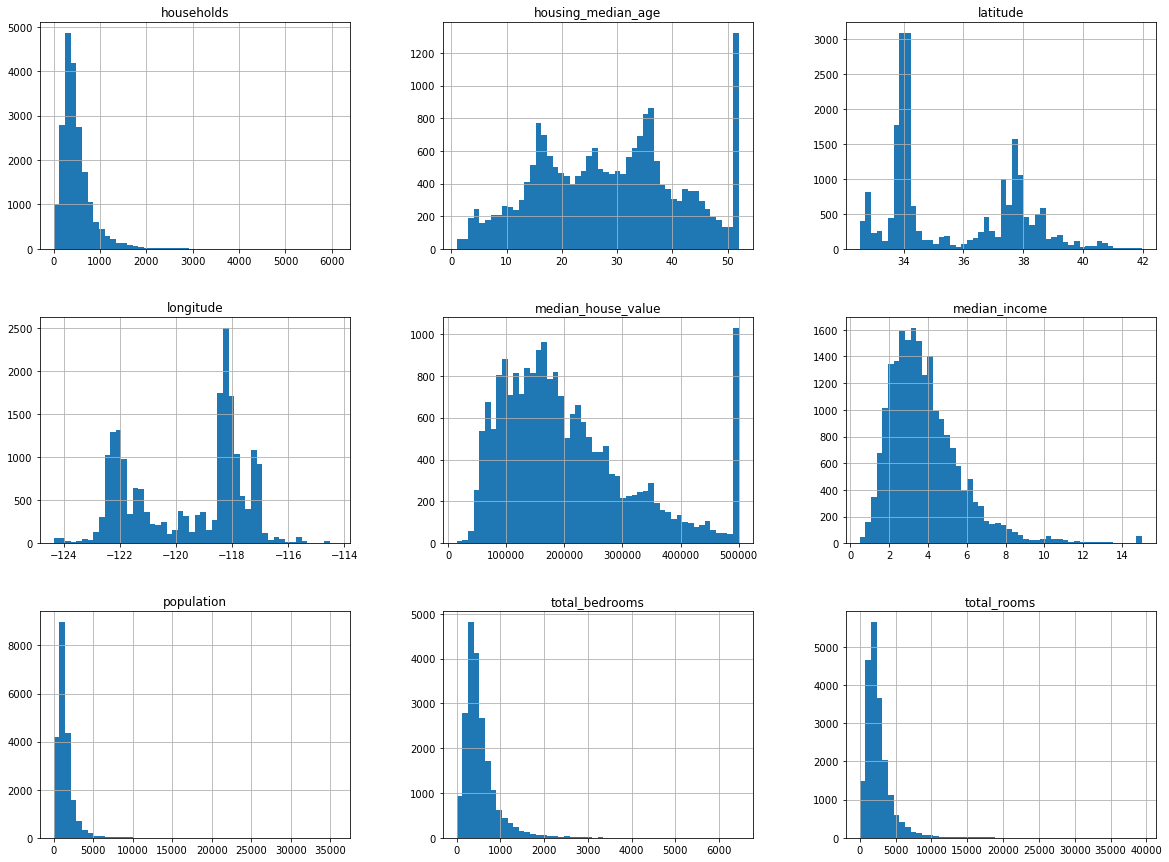

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
print "Number of applications: %d" % (len(housing))
print "Number of NaNs: %d" % (housing.isnull().values.sum())

Number of applications: 20640
Number of NaNs: 207


### Splitting the data

In [7]:
import numpy as np
# to make this notebook's output identical at every run
np.random.seed(40)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=40)
print "train set: ", len(train_set)
print "test set: ", len(test_set)
print "Number of NaNs training: %d" % (train_set.isnull().values.sum())
print "Number of NaNs testing: %d" % (test_set.isnull().values.sum())


train set:  16512
test set:  4128
Number of NaNs training: 160
Number of NaNs testing: 47


### Visualizing attributes

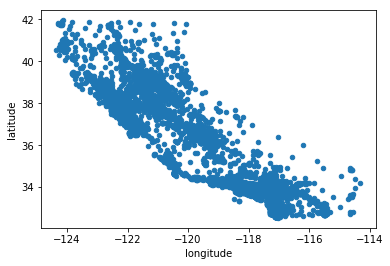

In [8]:
train_set.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

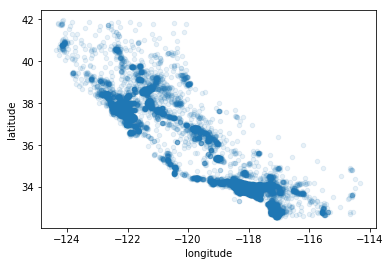

In [9]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

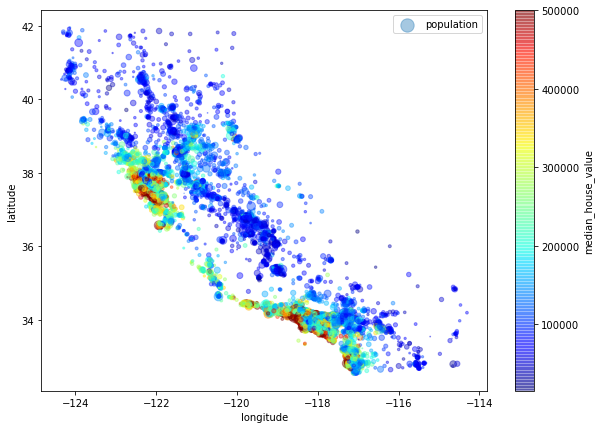

In [10]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

### Analizing attributes

In [11]:
corr_matrix = train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689565
total_rooms           0.136670
housing_median_age    0.104681
households            0.065653
total_bedrooms        0.049700
population           -0.022397
longitude            -0.048351
latitude             -0.142562
Name: median_house_value, dtype: float64

### Imputing data

In [12]:
housing_train = train_set.drop("median_house_value", axis=1) 
housing_labels = train_set["median_house_value"].copy()
housing_test = test_set.drop("median_house_value", axis=1) 
housing_test_labels = test_set["median_house_value"].copy()

sample_incomplete_rows = housing_train[housing_train.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5665,-118.29,33.73,30,3161,NaN,1865,771,2.7139,NEAR OCEAN
10915,-117.87,33.73,45,2264,NaN,1970,499,3.4193,<1H OCEAN
7763,-118.10,33.91,36,726,NaN,490,130,3.6389,<1H OCEAN
7668,-118.08,33.92,38,1335,NaN,1011,269,3.6908,<1H OCEAN
7547,-118.20,33.92,45,1283,NaN,1025,248,3.2798,<1H OCEAN


In [13]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

# remove the text feature because median can only be calculated on numerical attributes
housing_num_train = housing_train.drop("ocean_proximity", axis=1)
housing_num_test = housing_test.drop("ocean_proximity", axis=1)

imputer.fit(housing_num_train)
imputer.statistics_


array([ -118.49  ,    34.25  ,    29.    ,  2127.    ,   436.    ,
        1168.    ,   410.    ,     3.5313])

In [14]:
X = imputer.transform(housing_num_train)
housing_train = pd.DataFrame(X, columns=housing_num_train.columns, index = list(housing_train.index.values))
housing_train.loc[sample_incomplete_rows.index.values]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5665,-118.29,33.73,30.0,3161.0,436.0,1865.0,771.0,2.7139
10915,-117.87,33.73,45.0,2264.0,436.0,1970.0,499.0,3.4193
7763,-118.10,33.91,36.0,726.0,436.0,490.0,130.0,3.6389
7668,-118.08,33.92,38.0,1335.0,436.0,1011.0,269.0,3.6908
7547,-118.20,33.92,45.0,1283.0,436.0,1025.0,248.0,3.2798


In [15]:
X_test = imputer.transform(housing_num_test)
housing_test = pd.DataFrame(X_test, columns=housing_num_test.columns, index = list(housing_test.index.values))


### Encoding attributes

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat_train = train_set["ocean_proximity"]
housing_cat_test = test_set["ocean_proximity"]
housing_cat_encoded_train = encoder.fit_transform(housing_cat_train)
housing_cat_encoded_test = encoder.fit_transform(housing_cat_test)

housing_cat_encoded_train

array([1, 1, 0, ..., 4, 0, 0])

In [17]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot_train = encoder.fit_transform(housing_cat_encoded_train.reshape(-1,1))
housing_cat_1hot_test = encoder.fit_transform(housing_cat_encoded_test.reshape(-1,1))

housing_cat_1hot_train

<16512x5 sparse matrix of type '<type 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [19]:
housing_cat_1hot_train.toarray()

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [20]:
housing_prepared_train = np.hstack((housing_train.values,housing_cat_1hot_train.toarray()) )
housing_prepared_test = np.hstack((housing_test.values,housing_cat_1hot_test.toarray()) )

### Model training

In [21]:
from sklearn.linear_model import LinearRegression

# Create a baseline without any training
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_train, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# Grab some data
some_data = housing_prepared_train[:5]
some_labels = housing_labels[:5]
print "Predictions:", lin_reg.predict(some_data)


Predictions: [  88355.78241352  165952.64138854  125166.48761098  215328.41290358
  256844.47581861]


In [23]:
print("Ground truth values:", list(some_labels))

('Ground truth values:', [63300, 174300, 350000, 268800, 385900])


In [24]:
#Compute the error according to various "loss" functions
from sklearn.metrics import mean_squared_error, mean_absolute_error

housing_predictions = lin_reg.predict(housing_prepared_train)
lin_mse  = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
print "Training error"
print "Root of mean squared error: ", lin_rmse
print "Mean absolute error: ", lin_mae


Training error
Root of mean squared error:  68592.3419872
Mean absolute error:  49643.6282509


In [25]:
housing_predictions_test = lin_reg.predict(housing_prepared_test)
lin_mse  = mean_squared_error(housing_test_labels, housing_predictions_test)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(housing_test_labels, housing_predictions_test)

print "Test error"
print "Root of mean squared error: ", lin_rmse
print "Mean absolute error: ", lin_mae


Test error
Root of mean squared error:  69234.3174744
Mean absolute error:  50305.4101131
